In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pickle as pickle
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd gdrive/My Drive/maml_developmental_encoding-main/

/content/gdrive/My Drive/maml_developmental_encoding-main


In [ ]:
from indirect_maml import task

# Plots

In [ ]:
best_pd = pd.DataFrame(columns = ['condition','best_accuracy'])
accuracy_loss_pd = pd.DataFrame(columns = ['condition','TimePt','accuracy','loss'])

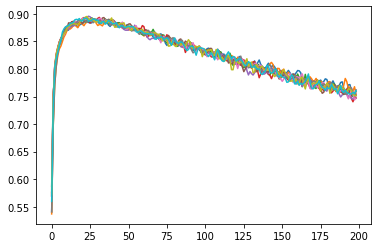

In [ ]:
with open('/content/gdrive/My Drive/DirectLongRuns', 'rb') as f:
  losses_storage,accuracies_storage = pickle.load(f)

for keys in accuracies_storage:
  patient_df = pd.DataFrame({'condition': ['Direct'],
                             'best_accuracy': [max(accuracies_storage[keys])]})
  best_pd = best_pd.append(patient_df,ignore_index = True)
  patient_df2 = pd.DataFrame({'condition': ['Direct']*len(accuracies_storage[keys]),
                             'TimePt': [250*x for x in range(len(accuracies_storage[keys]))],
                             'accuracy': accuracies_storage[keys],
                             'loss': losses_storage[keys]
                             })
  accuracy_loss_pd = accuracy_loss_pd.append(patient_df2)
  plt.plot(np.convolve(accuracies_storage[keys],np.ones(2)/2.0,mode="valid"))



In [ ]:
best_pd

,condition,best_accuracy
0,Direct,0.891000
1,Direct,0.892625
2,Direct,0.895844
3,Direct,0.896219
4,Direct,0.896281
5,Direct,0.894719
6,Direct,0.892813
7,Direct,0.895469
8,Direct,0.896469
9,Direct,0.893844


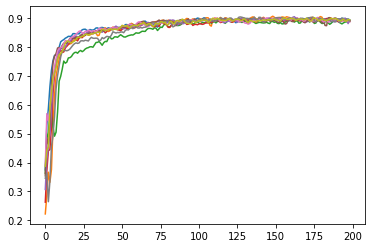

In [ ]:
with open('/content/gdrive/My Drive/Simple_10Compress_LearnedParams', 'rb') as f:
  losses_storage,accuracies_storage = pickle.load(f)

del accuracies_storage['simple_GEM_10compression_LearnedParams_4']
del accuracies_storage['simple_GEM_10compression_LearnedParams_5']
del losses_storage['simple_GEM_10compression_LearnedParams_4']
del losses_storage['simple_GEM_10compression_LearnedParams_5']

for keys in accuracies_storage:
  patient_df = pd.DataFrame({'condition': ['10x'],
                             'best_accuracy': [max(accuracies_storage[keys])]})
  best_pd = best_pd.append(patient_df,ignore_index = True)
  patient_df2 = pd.DataFrame({'condition': ['10x']*len(accuracies_storage[keys]),
                             'TimePt': [250*x for x in range(len(accuracies_storage[keys]))],
                             'accuracy': accuracies_storage[keys],
                             'loss': losses_storage[keys]
                             })
  accuracy_loss_pd = accuracy_loss_pd.append(patient_df2)
  plt.plot(np.convolve(accuracies_storage[keys],np.ones(2)/2.0,mode="valid"))


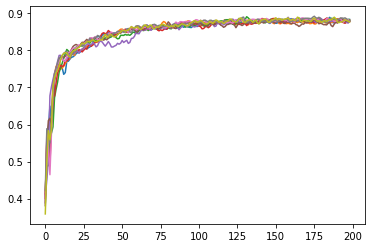

In [ ]:
with open('/content/gdrive/My Drive/Simple_25Compress_LearnedParams', 'rb') as f:
  losses_storage,accuracies_storage = pickle.load(f)

del accuracies_storage['simple_GEM_25compression_LearnedParams_0']
del losses_storage['simple_GEM_25compression_LearnedParams_0']

for keys in accuracies_storage:
  patient_df = pd.DataFrame({'condition': ['25x'],
                             'best_accuracy': [max(accuracies_storage[keys])]})
  best_pd = best_pd.append(patient_df,ignore_index = True)
  patient_df2 = pd.DataFrame({'condition': ['25x']*len(accuracies_storage[keys]),
                             'TimePt': [250*x for x in range(len(accuracies_storage[keys]))],
                             'accuracy': accuracies_storage[keys],
                             'loss': losses_storage[keys]
                             })
  accuracy_loss_pd = accuracy_loss_pd.append(patient_df2)
  plt.plot(np.convolve(accuracies_storage[keys],np.ones(2)/2.0,mode="valid"))

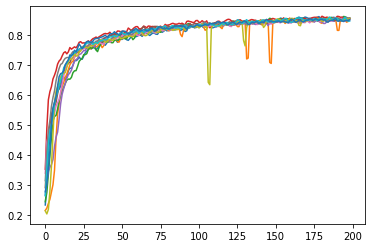

In [ ]:
with open('/content/gdrive/My Drive/Spatial_500Compress_LearnedParams', 'rb') as f:
  losses_storage,accuracies_storage = pickle.load(f)

best = []
for keys in accuracies_storage:
  patient_df = pd.DataFrame({'condition': ['500x'],
                             'best_accuracy': [max(accuracies_storage[keys])]})
  best_pd = best_pd.append(patient_df,ignore_index = True)
  patient_df2 = pd.DataFrame({'condition': ['500x']*len(accuracies_storage[keys]),
                             'TimePt': [250*x for x in range(len(accuracies_storage[keys]))],
                             'accuracy': accuracies_storage[keys],
                             'loss': losses_storage[keys]
                             })
  accuracy_loss_pd = accuracy_loss_pd.append(patient_df2)
  plt.plot(np.convolve(accuracies_storage[keys],np.ones(2)/2.0,mode="valid"))

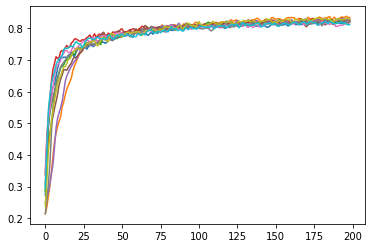

In [ ]:
with open('/content/gdrive/My Drive/Spatial_1000Compress_LearnedParams', 'rb') as f:
  losses_storage,accuracies_storage = pickle.load(f)

best = []
for keys in accuracies_storage:
  patient_df = pd.DataFrame({'condition': ['1000x'],
                             'best_accuracy': [max(accuracies_storage[keys])]})
  best_pd = best_pd.append(patient_df,ignore_index = True)
  patient_df2 = pd.DataFrame({'condition': ['1000x']*len(accuracies_storage[keys]),
                             'TimePt': [250*x for x in range(len(accuracies_storage[keys]))],
                             'accuracy': accuracies_storage[keys],
                             'loss': losses_storage[keys]
                             })
  accuracy_loss_pd = accuracy_loss_pd.append(patient_df2)
  plt.plot(np.convolve(accuracies_storage[keys],np.ones(2)/2.0,mode="valid"))

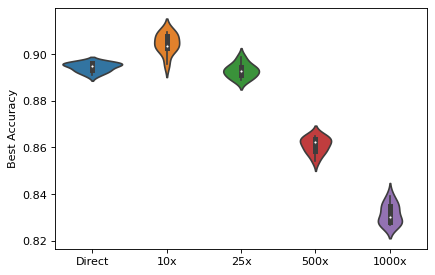

In [ ]:
plt.figure(figsize=(6, 4), dpi=80)
ax = sns.violinplot(data = best_pd, x = 'condition', y = 'best_accuracy')
ax.set(xlabel='', ylabel='Best Accuracy');
plt.savefig('/content/gdrive/My Drive/LongRunsBest.pdf')

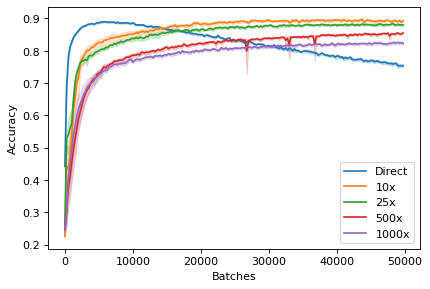

In [ ]:
plt.figure(figsize=(6, 4), dpi=80)
ax = sns.lineplot(data = accuracy_loss_pd, x = 'TimePt', y = 'accuracy',hue='condition')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
ax.set(xlabel='Batches', ylabel='Accuracy')
plt.savefig('/content/gdrive/My Drive/LongRunsAcc.pdf')

KeyboardInterrupt: ignored

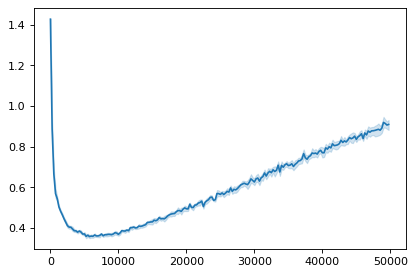

In [ ]:
plt.figure(figsize=(6, 4), dpi=80)
ax = sns.lineplot(data = accuracy_loss_pd, x = 'TimePt', y = 'loss',hue='condition')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
ax.set(xlabel='', ylabel='')
ax.set(yscale = 'log')
plt.savefig('/content/gdrive/My Drive/LongRunsLoss.pdf')

In [ ]:
best_pd.groupby(['condition']).mean()

,best_accuracy
condition,
1000x,0.831503
10x,0.904625
25x,0.893000
500x,0.861011
Direct,0.894528


In [ ]:
best_pd.groupby(['condition']).std()

,best_accuracy
condition,
1000x,0.004361
10x,0.004338
25x,0.003035
500x,0.003445
Direct,0.001881
